Assignment 4 \
Part 1: Car Evaluation Multi-class Classification\
Submitted by Group 5 \

Groupmembers:

1. Sajan Kumer Sarker (2111131642) (sajan.sarker@northsouth.edu)
2. Rafsan Jani Chowdhury (2011424642) (rafsan.chowdhury@northsouth.edu)
3. Rosely Mohammad (2014219642) (rosely.mohammad@northsouth.edu)

Task: \
1) Experiment with Decision Trees and XGBoost

2) Understanding of Evaluation metrics



**For Multi-class Classification problem report: Accuracy, Confusion matrix, Average Precision, Average Recall, Average F-score**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor

In [3]:
car_evaluation = pd.read_csv('/content/drive/MyDrive/CSE445-Assignment/Assignment-4/dataset/car.data')

In [4]:
car_evaluation.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_evaluation.columns = column_names
car_evaluation.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
print('Number of missing values: ')
print(car_evaluation.isnull().sum())

Number of missing values: 
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


**Mapping categorical data to numerical data**

In [7]:
car_evaluation['buying'] = car_evaluation['buying'].map({'vhigh':3, 'high':2, 'med':1, 'low':0})
car_evaluation['maint'] = car_evaluation['maint'].map({'vhigh':3, 'high':2, 'med':1, 'low':0})
car_evaluation['doors'] = car_evaluation['doors'].map({'2':0, '3':1, '4':2, '5more':3})
car_evaluation['persons'] = car_evaluation['persons'].map({'2':0, '4':1, 'more':2})
car_evaluation['lug_boot'] = car_evaluation['lug_boot'].map({'small':0, 'med':1, 'big': 2})
car_evaluation['safety'] = car_evaluation['safety'].map({'low':0, 'med':1, 'high': 2})

car_evaluation['class'] = car_evaluation['class'].map({'unacc':0, 'acc':1, 'good': 2, 'vgood':3})

In [8]:
car_evaluation.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,0,1,0
1,3,3,0,0,0,2,0
2,3,3,0,0,1,0,0
3,3,3,0,0,1,1,0
4,3,3,0,0,1,2,0


**Train, Validation, Test Split**

In [9]:
X = car_evaluation.drop(columns='class')
y = car_evaluation['class']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'Train Data Shape (X, y): {X_train.shape, y_train.shape}')
print(f'Validation Data Shape (X, y): {X_val.shape, y_val.shape}')
print(f'Test Data Shape (X, y): {X_test.shape, y_test.shape}')

Train Data Shape (X, y): ((1208, 6), (1208,))
Validation Data Shape (X, y): ((259, 6), (259,))
Test Data Shape (X, y): ((260, 6), (260,))


In [10]:
# initialize the classifier models
dt_classifier = DecisionTreeClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

# initialize hyperparameters for gridsearchCV
dt_param_grid = {
    'max_depth': [2,4,8,10],
    'min_samples_split': [2,4,5,10],
    'min_samples_leaf': [1,3,5,8,10]
}

xgb_param_grid = {
    'max_depth': [3,5,7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0]
}

**hyperparameter tuning with validation dataset.**


In [11]:
# Decision Tree:
dt_grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

dt_best_params = dt_grid_search.best_params_
dt_best_score = dt_grid_search.best_score_
print(f"Decision Tree Best Parameters: {dt_best_params}")
print(f"Decision Tree Best Score: {dt_best_score}")

Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Best Score: 0.9735159973937794


In [12]:
# XGBoost:
xgb_grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)

xgb_best_params = xgb_grid_search.best_params_
xgb_best_score = xgb_grid_search.best_score_
print(f"XGBoost Best Parameters: {xgb_best_params}")
print(f"XGBoost Best Score: {xgb_best_score}")

XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
XGBoost Best Score: 0.9867631425534104


In [13]:
# now retrain the model on the combined training and validation set with the best hyperparameters
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

dt_final_model = DecisionTreeClassifier(**dt_best_params, random_state=42)
xgb_final_model = XGBClassifier(**xgb_best_params, random_state=42)

In [14]:
# retrain decision tree final model
dt_final_model.fit(X_train_val, y_train_val)
print(f"Decision Tree Best Score: {dt_best_score}")

Decision Tree Best Score: 0.9735159973937794


In [15]:
# retrain xgboost final model
xgb_final_model.fit(X_train_val, y_train_val)
print(f"XGBoost Best Score: {xgb_best_score}")

XGBoost Best Score: 0.9867631425534104


In [16]:
# evaluate the final model on test set
y_test_pred_dt = dt_final_model.predict(X_test)
y_test_pred_xgb = xgb_final_model.predict(X_test)

In [17]:
# functions to calculate: accuracy, average precision, average recall, average f-score.

# Accuracy
def accuracy_score(y_actual, y_predict):
  correct = 0
  total_samples = len(y_actual)

  for predict, actual in zip(y_predict, y_actual):
    if predict == actual:
      correct += 1

  return (correct/ total_samples)

# Precision
def precision_score(y_actual, y_predict):
  precision_scores = []

  for class_label in set(y_actual):
    true_positive = 0
    false_positive = 0

    for actual, predict in zip(y_actual, y_predict):
      if predict == class_label:
        if actual == class_label:
          true_positive += 1
        else:
          false_positive += 1

    if true_positive+false_positive ==0:
      class_precision = 0.0
    else:
      class_precision = true_positive / (true_positive + false_positive)
    precision_scores.append(class_precision)
  return precision_scores

# average precision
def average_precision_score_macro(precision_score, y_actual):
  return sum(precision_score)/len(set(y_actual))

# recall
def recall_score(y_actual, y_predict):
  recall_scores = []

  for class_label in set(y_actual):
    true_positive = 0
    false_negative = 0

    for actual, predict in zip(y_actual, y_predict):
      if actual == class_label:
        if predict == class_label:
          true_positive += 1
        else:
          false_negative += 1

    if true_positive+false_negative ==0:
      class_recall = 0.0
    else:
      class_recall = true_positive / (true_positive + false_negative)

    recall_scores.append(class_recall)
  return recall_scores

# average recall
def average_recall_score_macro(recall_score, y_actual):
  return sum(recall_score)/len(set(y_actual))

# f-score
def fscore(y_actual,y_predict):
  f_score_total = []

  for class_label in set(y_actual):
    true_positive = 0
    false_positive = 0
    false_negative = 0

    for actual, predict in zip(y_actual, y_predict):
      if predict == class_label:
        if actual == class_label:
          true_positive += 1
        else:
          false_positive += 1
      elif actual == class_label:
        false_negative += 1

    if true_positive + false_positive == 0:
      precision = 0.0
    else:
      precision = true_positive/(true_positive+false_positive)

    if true_positive + false_negative == 0:
      precision = 0.0
    else:
      recall = true_positive/(true_positive+false_negative)

    if precision + recall ==0:
      f_score = 0.0
    else:
      f_score = 2*true_positive/((2*true_positive)+false_positive+false_negative)

    f_score_total.append(f_score)
  return f_score_total

# fscore average
def fscore_average_macro(fscore, y_actual):
  return sum(fscore)/len(set(y_actual))

**Evaluation metrics**

In [18]:
print("Decision Tree: ")
print(f'Accuracy: {accuracy_score(y_test, y_test_pred_dt)}')
precision = precision_score(y_test, y_test_pred_dt)
print(f'Average Precision: {average_precision_score_macro(precision, y_test)}')
recall = recall_score(y_test, y_test_pred_dt)
print(f'Average Recall: {average_recall_score_macro(recall, y_test)}')
f_score = fscore(y_test, y_test_pred_dt)
print(f'Average F1-Score: {fscore_average_macro(f_score, y_test)}')
print()

print("XGBoost: ")
print(f'Accuracy: {accuracy_score(y_test, y_test_pred_xgb)}')
precision = precision_score(y_test, y_test_pred_xgb)
print(f'Average Precision: {average_precision_score_macro(precision, y_test)}')
recall = recall_score(y_test, y_test_pred_xgb)
print(f'Average Recall: {average_recall_score_macro(recall, y_test)}')
f_score = fscore(y_test, y_test_pred_xgb)
print(f'Aveerage F1-Score: {fscore_average_macro(f_score, y_test)}')

Decision Tree: 
Accuracy: 0.9730769230769231
Average Precision: 0.8985294117647059
Average Recall: 0.9265184951660361
Average F1-Score: 0.9094013683852757

XGBoost: 
Accuracy: 0.9807692307692307
Average Precision: 0.9223707664884135
Average Recall: 0.9326923076923077
Aveerage F1-Score: 0.9232740021574973


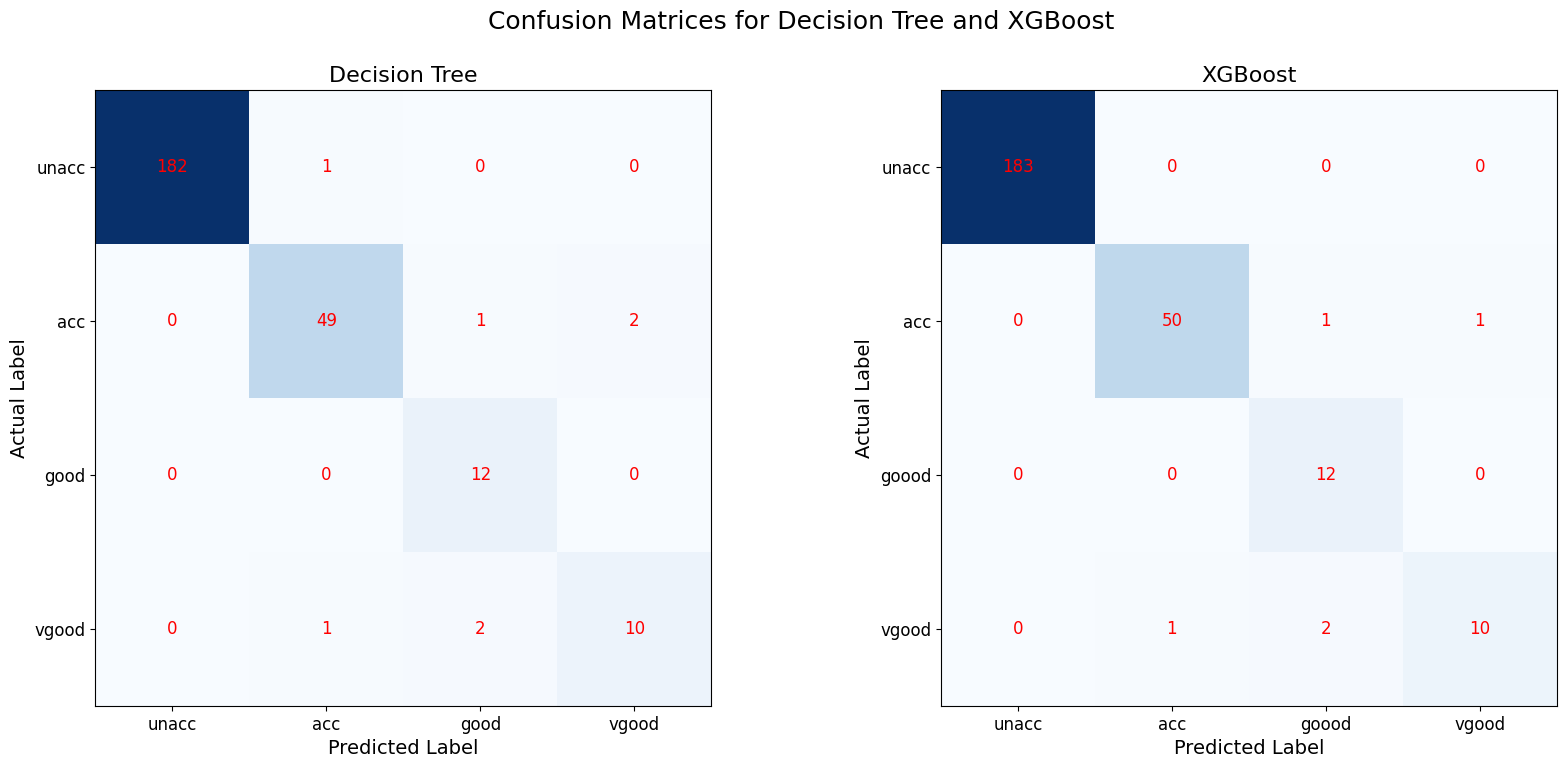

In [19]:
num_class = len(set(y_test))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# confusion matrix for Decision Tree
conf_matrix_dt = np.zeros((num_class, num_class), dtype=int)
for actual, predict in zip(y_test, y_test_pred_dt):
    conf_matrix_dt[actual, predict] += 1

# plotting
ax1.imshow(conf_matrix_dt, cmap='Blues', interpolation='nearest')
ax1.set_title('Decision Tree', fontsize=16)
ax1.set_xlabel('Predicted Label', fontsize=14)
ax1.set_ylabel('Actual Label', fontsize=14)
ax1.set_xticklabels(['unacc', 'acc', 'good', 'vgood'], fontsize=12)
ax1.set_yticklabels(['unacc', 'acc', 'good', 'vgood'], fontsize=12)

for i in range(num_class):
    for j in range(num_class):
        ax1.text(j, i, str(conf_matrix_dt[i, j]), ha='center', va='center', color='red', fontsize=12)

# confusion matrix for XGBoost
conf_matrix_xgb = np.zeros((num_class, num_class), dtype=int)
for actual, predict in zip(y_test, y_test_pred_xgb):
    conf_matrix_xgb[actual, predict] += 1

# Plotting
ax2.imshow(conf_matrix_xgb, cmap='Blues', interpolation='nearest')
ax2.set_title('XGBoost', fontsize=16)
ax2.set_xlabel('Predicted Label', fontsize=14)
ax2.set_ylabel('Actual Label', fontsize=14)
ax2.set_xticklabels(['unacc', 'acc', 'good', 'vgood'], fontsize=12)
ax2.set_yticklabels(['unacc', 'acc', 'good', 'vgood'], fontsize=12)

for i in range(num_class):
    for j in range(num_class):
        ax2.text(j, i, str(conf_matrix_xgb[i, j]), ha='center', va='center', color='red', fontsize=12)

# common properties
for ax in (ax1, ax2):
    ax.set_xticks(np.arange(num_class))
    ax.set_yticks(np.arange(num_class))
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.xticks([0, 1, 2, 3], ['unacc', 'acc', 'goood', 'vgood'])
plt.yticks([0, 1, 2, 3], ['unacc', 'acc', 'goood', 'vgood'])
plt.suptitle('Confusion Matrices for Decision Tree and XGBoost', fontsize=18)
plt.show()